In [16]:
import random
import faker
from datetime import datetime, timedelta

# สร้างตัวแปร faker สำหรับการสร้างข้อมูลจำลอง
fake = faker.Faker()

# ฟังก์ชันสุ่มวันที่
def random_date(start_date, end_date):
    start_timestamp = datetime.strptime(start_date, "%Y-%m-%d")
    end_timestamp = datetime.strptime(end_date, "%Y-%m-%d")
    delta = end_timestamp - start_timestamp
    random_days = random.randint(0, delta.days)
    return start_timestamp + timedelta(days=random_days)

# จำนวนข้อมูลที่ต้องการสร้าง
num_events = 100
num_participants = 100
num_participations = 100

# สุ่มข้อมูล Event
events = []
for i in range(num_events):
    event_name = f"Event {i + 1}"
    organizer = f"Organizer {i + 1}"
    location = f"Location {i + 1}"
    date = random_date('2024-01-01', '2024-12-31').date()  # สุ่มวันที่
    events.append((event_name, organizer, location, date))

# สุ่มข้อมูล Participant
participants = []
for i in range(num_participants):
    name = fake.name()
    email = fake.email()
    phone = fake.phone_number()
    participants.append((name, email, phone))

# สุ่มข้อมูล Participation
participations = []
for i in range(num_participations):
    event_id = random.randint(1, num_events)
    participant_id = random.randint(1, num_participants)
    participation_date = fake.date_this_year()  # ใช้วันที่ในปีนี้
    status = random.choice(['Confirmed', 'Pending', 'Cancelled'])
    participations.append((event_id, participant_id, participation_date, status))

# แสดงตัวอย่างข้อมูล
print("Events:")
for event in events[:101]:
    print(event)

print("\nParticipants:")
for participant in participants[:101]:
    print(participant)

print("\nParticipations:")
for participation in participations[:101]:
    print(participation)


Events:
('Event 1', 'Organizer 1', 'Location 1', datetime.datetime(2024, 1, 21, 0, 0))
('Event 2', 'Organizer 2', 'Location 2', datetime.datetime(2024, 3, 7, 0, 0))
('Event 3', 'Organizer 3', 'Location 3', datetime.datetime(2024, 2, 2, 0, 0))
('Event 4', 'Organizer 4', 'Location 4', datetime.datetime(2024, 12, 23, 0, 0))
('Event 5', 'Organizer 5', 'Location 5', datetime.datetime(2024, 10, 6, 0, 0))
('Event 6', 'Organizer 6', 'Location 6', datetime.datetime(2024, 11, 18, 0, 0))
('Event 7', 'Organizer 7', 'Location 7', datetime.datetime(2024, 6, 26, 0, 0))
('Event 8', 'Organizer 8', 'Location 8', datetime.datetime(2024, 8, 11, 0, 0))
('Event 9', 'Organizer 9', 'Location 9', datetime.datetime(2024, 10, 11, 0, 0))
('Event 10', 'Organizer 10', 'Location 10', datetime.datetime(2024, 9, 23, 0, 0))
('Event 11', 'Organizer 11', 'Location 11', datetime.datetime(2024, 1, 24, 0, 0))
('Event 12', 'Organizer 12', 'Location 12', datetime.datetime(2024, 8, 17, 0, 0))
('Event 13', 'Organizer 13', 'Loca

In [4]:
LIGHT_SPEED = 3e8  # ความเร็วแสง (m/s)
DOG_SPEED = 4 * 1000 / 3600  # แปลงเป็น m/s = 1.1111...

def method1_time(size):  
    FileToBits = size * 1000000 * 8
    Wifi_SP = 90000000  # bps
    send_time = FileToBits / Wifi_SP
    signal_time = 231 / LIGHT_SPEED
    return round(send_time + signal_time, 2)

def method2_time(size): 
    W_speed = 190 
    R_speed = 245 
    W_time = size / W_speed
    dog_time = 231 / DOG_SPEED
    read_time = size / R_speed
    return round(W_time + dog_time + read_time, 2)

method1_time(884)
print("Method 1 Time:", method1_time(884))
print("Method 2 Time:", method2_time(884))
method2_time(884)

Method 1 Time: 78.58
Method 2 Time: 216.16


216.16

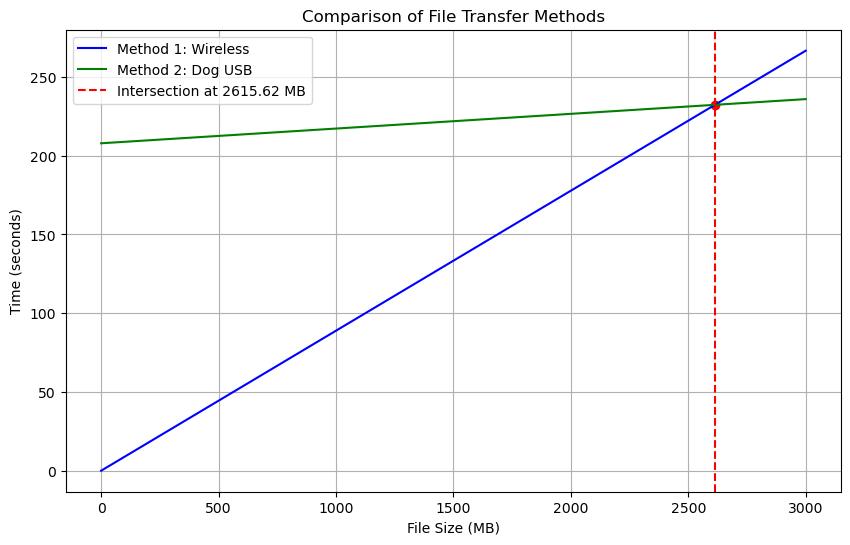

Method 2 becomes faster than Method 1 at file size ≈ 2615.62 MB


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
LIGHT_SPEED = 3e8  # m/s
DOG_SPEED = 4 * 1000 / 3600  # m/s

# Method 1: Wireless
def method1_time(size):  
    file_bits = size * 1_000_000 * 8
    wifi_speed = 90_000_000  # bps
    send_time = file_bits / wifi_speed
    signal_time = 231 / LIGHT_SPEED
    return send_time + signal_time

# Method 2: Dog with USB
def method2_time(size): 
    write_speed = 190  # MB/s
    read_speed = 245   # MB/s
    write_time = size / write_speed
    dog_time = 231 / DOG_SPEED
    read_time = size / read_speed
    return write_time + dog_time + read_time

# Range of file sizes (in MB)
sizes = np.linspace(0, 3000, 1000)
times_m1 = [method1_time(s) for s in sizes]
times_m2 = [method2_time(s) for s in sizes]

# Plotting
plt.figure(figsize=(10,6))
plt.plot(sizes, times_m1, label='Method 1: Wireless', color='blue')
plt.plot(sizes, times_m2, label='Method 2: Dog USB', color='green')
plt.xlabel('File Size (MB)')
plt.ylabel('Time (seconds)')
plt.title('Comparison of File Transfer Methods')
plt.legend()
plt.grid(True)

# Highlight intersection point (approximate)
for s in sizes:
    if method2_time(s) < method1_time(s):
        intersect_x = s
        intersect_y = method2_time(s)
        break

plt.axvline(intersect_x, color='red', linestyle='--', label=f'Intersection at {intersect_x:.2f} MB')
plt.scatter(intersect_x, intersect_y, color='red')
plt.legend()
plt.show()

print(f"Method 2 becomes faster than Method 1 at file size ≈ {intersect_x:.2f} MB")


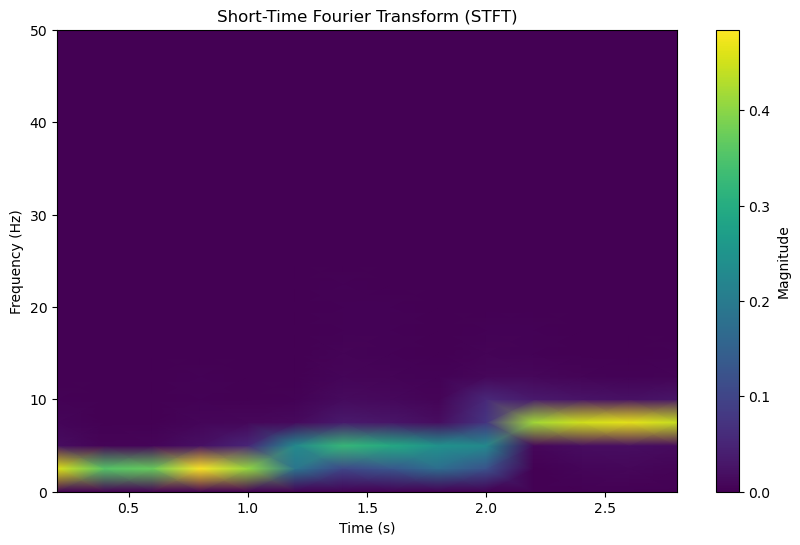

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# ตั้งค่าพารามิเตอร์
Fs = 100  # Sampling frequency (Hz)
T = 3  # ระยะเวลาทั้งหมด (วินาที)
t = np.arange(0, T, 1/Fs)

# กำหนดสัญญาณ x(t)
x = np.piecewise(t, 
                 [t < 1, (t >= 1) & (t < 2), (t >= 2) & (t <= 3)], 
                 [lambda t: np.sin(4*np.pi*t), 
                  lambda t: np.sin(8*np.pi*t), 
                  lambda t: np.sin(16*np.pi*t)])

# ใช้ scipy.signal.spectrogram เพื่อคำนวณ STFT
window_length = int(0.4 * Fs)  # 40 ตัวอย่าง
overlap = int(window_length / 2)  # 50% overlap = 20 ตัวอย่าง
f, t_stft, Sxx = spectrogram(x, fs=Fs, window='boxcar', nperseg=window_length, noverlap=overlap, scaling='spectrum')

# แสดงผลลัพธ์เป็น Spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_stft, f, np.abs(Sxx), shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Short-Time Fourier Transform (STFT)')
plt.colorbar(label='Magnitude')
plt.show()


In [27]:
import random
import faker
from datetime import datetime, timedelta

# สร้างตัวแปร faker สำหรับการสร้างข้อมูลจำลอง
fake = faker.Faker()

# ฟังก์ชันสุ่มวันที่
def random_date(start_date, end_date):
    start_timestamp = datetime.strptime(start_date, "%Y-%m-%d")
    end_timestamp = datetime.strptime(end_date, "%Y-%m-%d")
    delta = end_timestamp - start_timestamp
    random_days = random.randint(0, delta.days)
    return (start_timestamp + timedelta(days=random_days)).strftime('%Y-%m-%d')  # แสดงวันที่ในรูปแบบ YYYY-MM-DD

# จำนวนข้อมูลที่ต้องการสร้าง
num_events = 10
num_participants = 100
num_participations = 100

# สุ่มข้อมูล Event
events = []
for i in range(num_events):
    event_name = f"Event {i + 1}"
    organizer = f"Organizer {i + 1}"
    location = f"Location {i + 1}"
    date = random_date('2024-01-01', '2024-12-31')  # สุ่มวันที่และแสดงในรูปแบบที่ต้องการ
    events.append((i,event_name, organizer, location, date))
def random_phone_number():
    return f"{random.randint(1000000000, 9999999999)}"
# สุ่มข้อมูล Participant
participants = []
for i in range(num_participants):
    name = fake.name()
    email = fake.email()
    phone = random_phone_number()
    participants.append((i,name, email, phone))

# สุ่มข้อมูล Participation
participations = []
for i in range(num_participations):
    event_id = random.randint(1, num_events)
    participant_id = random.randint(1, num_participants)
    participation_date = random_date('2024-01-01', '2024-12-31')  # ใช้วันที่ในปีนี้
    status = random.choice(['Confirmed', 'Pending', 'Cancelled'])
    participations.append((i,event_id, participant_id, participation_date, status))

# แสดงตัวอย่างข้อมูล
print("Events:")
for event in events[:11]:
    print(f'{event},')

print("\nParticipants:")
for participant in participants[:101]:
    print(f'{participant},')

print("\nParticipations:")
for participation in participations[:101]:
    print(f'{participation},')


Events:
(0, 'Event 1', 'Organizer 1', 'Location 1', '2024-11-15'),
(1, 'Event 2', 'Organizer 2', 'Location 2', '2024-12-04'),
(2, 'Event 3', 'Organizer 3', 'Location 3', '2024-11-13'),
(3, 'Event 4', 'Organizer 4', 'Location 4', '2024-11-25'),
(4, 'Event 5', 'Organizer 5', 'Location 5', '2024-04-15'),
(5, 'Event 6', 'Organizer 6', 'Location 6', '2024-08-04'),
(6, 'Event 7', 'Organizer 7', 'Location 7', '2024-05-22'),
(7, 'Event 8', 'Organizer 8', 'Location 8', '2024-11-05'),
(8, 'Event 9', 'Organizer 9', 'Location 9', '2024-01-11'),
(9, 'Event 10', 'Organizer 10', 'Location 10', '2024-08-06'),

Participants:
(0, 'Gabriel Adams', 'myersrobert@example.com', '2966121240'),
(1, 'Kyle Sampson', 'barbersusan@example.org', '3961599063'),
(2, 'Kelly Cooper', 'florescatherine@example.com', '2028470825'),
(3, 'Melanie Nelson', 'zmcgee@example.org', '8327537213'),
(4, 'Tara Becker', 'jrodriguez@example.net', '5846928898'),
(5, 'Bryan Clark', 'melissa35@example.com', '1233265840'),
(6, 'Brian Gree

In [2]:
pip install faker


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 MB 20.9 MB/s eta 0:00:00
